In [1]:
%pylab inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


In [41]:
t=linspace(0, 100*pi, 2000)

In [42]:
x=sin(t)+sin(3*t)/3+sin(5*t)/5
# x=sin(t)

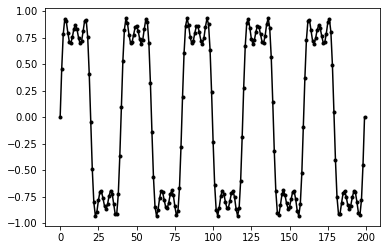

In [40]:
plot(x, "k.-")

In [43]:
scaler=MinMaxScaler()

In [44]:
x=scaler.fit_transform(x.reshape(-1,1))

In [45]:
N=x.shape[0]

In [46]:
N

2000

In [47]:
X=[]
Y=[]
P=1024 # liczba wektorów uczących
L=20 # szerokość okna (liczba próbek)
for i in range(P):
    pos=randint(N-L)
    X.append(x[pos:pos+L,0])
    Y.append([x[pos+L,0]])
X=array(X)
Y=array(Y)

In [48]:
X.shape, Y.shape

((1024, 20), (1024, 1))

In [49]:
model = keras.models.Sequential()
model.add(layers.Dense(10, input_dim=L, activation='sigmoid'))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(loss="mse", optimizer='adam')

In [72]:
model.fit(X, Y, epochs=50, verbose=0, batch_size=16);

In [73]:
model.evaluate(X,Y)

1024/1024 [==============================] - 0s 256us/sample - loss: 8.3045e-04


0.0008304532348120119

In [74]:
pred=x[0:L,0].tolist() # bootstrap

In [75]:
for i in range(100):
    pred.append(model.predict(array(pred[-L:]).reshape(-1,L))[0,0])

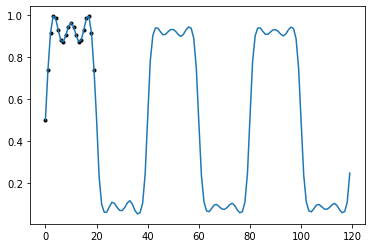

In [76]:
plot(x[0:L,0], "k.")
plot(pred)

In [78]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(20, 10) dtype=float32, numpy=
 array([[-0.09237979,  0.5130262 , -0.6662232 ,  0.51005906, -0.9551234 ,
         -0.28507942, -0.47684315, -0.14813854,  0.6389762 ,  0.1069571 ],
        [ 0.23658071,  0.26079088, -0.6380832 ,  0.0330077 , -0.35302982,
         -0.67673993, -0.3443254 , -0.49874353,  0.28542948,  0.84041   ],
        [ 0.919765  ,  0.03749396, -0.00963413,  0.43178517,  0.09173606,
         -0.3578426 , -0.4675386 , -1.0244762 ,  0.64240706,  0.6794154 ],
        [ 1.0125209 ,  0.31044042, -0.08325581,  0.5365207 ,  0.66220206,
          0.360357  ,  0.38580468, -1.1844661 ,  0.3857826 , -0.15500781],
        [ 0.8573195 , -0.52229595, -0.6325732 ,  0.2650718 , -0.01488855,
          0.6622006 ,  0.5310353 , -1.328237  ,  0.40817675, -0.52570385],
        [ 0.6510767 , -0.10469573, -0.29987627, -0.13571449,  0.5602431 ,
          0.5694081 ,  0.11929033, -1.012167  ,  0.6315826 , -0.15247597],
        [ 0.49438247, -0.07922059, -